In [15]:
import numpy as np
import matplotlib.pyplot as plt

## CogSci 131 - Assignment 3
Selena Zhang

## Question 1a

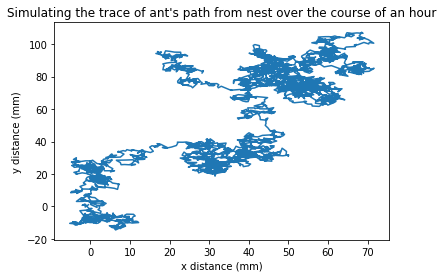

In [16]:
#seed for reproducibility
np.random.seed(777)
starting_point = [0, 0]
x_1a = np.random.normal(0, 1, 3600)
y_1a = np.random.normal(0, 1, 3600)
x_path_1a = np.cumsum(starting_point[0] + x_1a)
y_path_1a = np.cumsum(starting_point[1] + y_1a)
#plt.figure(figsize = (10, 10))

plt.plot(x_path_1a, y_path_1a)
plt.title("Simulating the trace of ant's path from nest over the course of an hour")
plt.xlabel("x distance (mm)")
plt.ylabel("y distance (mm)")
plt.show()

## Question 1b

I noticed that running about 1000 simulations of the ant wandering would be enough to determine the probability the ant comes back to the nest in time. Running significantly more trials did not change the probability significantly, but running fewer trials may cause the probability to be overrepresented due to a small sample size. 
The probability given by this simulation is around 15%, which suggests that randomly walking back is a bad strategy. Ants need to reliably get back to their nest and, a 15% success rate implies that 6 out of 7 times the ant will not make it, which is way too high. 

In [17]:
np.random.seed(777)
def distance(x, y):
    return (x**2 + y**2)**0.5

replications = 1000
limit = 3600
success_counter = 0

def move():
    x_1b = np.cumsum(np.random.normal(0, 1, 3600))
    y_1b = np.cumsum(np.random.normal(0, 1, 3600))
    food_point = [x_1b[-1], y_1b[-1]]
    steps = 0
    x_path_1b = food_point[0] 
    y_path_1b = food_point[1]
        
    while distance(x_path_1b, y_path_1b) >= 5:
        randomx = np.random.normal(0, 1)
        x_path_1b += randomx
        randomy = np.random.normal(0, 1)
        y_path_1b += randomy
        steps += 1
        if steps >= 3600:
            break
    return steps

for i in range(replications+1):
    steps = move()
    if steps < limit:
        success_counter += 1
prob = success_counter/replications
print(prob)

0.156


## Question 1c

In [18]:
replications = 1000
limit = 3600

def min_move():
    array_x = []
    array_y = []
    x_1c = np.cumsum(np.random.normal(0, 1, 3600))
    y_1c = np.cumsum(np.random.normal(0, 1, 3600))
    food_point = [x_1c[-1], y_1c[-1]]
    steps = 0
    x_path_1b = food_point[0] 
    y_path_1b = food_point[1]
    while steps <=3600:
        randomx = np.random.normal(0, 1)
        x_path_1b += randomx
        array_x.append(x_path_1b)
        randomy = np.random.normal(0, 1)
        y_path_1b += randomy
        array_y.append(y_path_1b)
        steps += 1
    for i, j in zip(array_x, array_y):
        distance_array = []
        distance_array.append(distance(i, j))
    return min(distance_array)
average_min = []
for i in range(replications + 1):
    mins = min_move()
    average_min.append(mins)
closest = sum(average_min)/len(average_min)

print(closest)

107.37152767298346


## Question 2

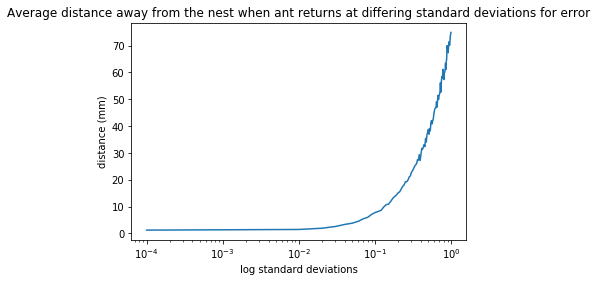

In [61]:
mean_arr = []
S = np.arange(0.0001, 1, 0.01)
for s in S:
    final_distance_array = []
    for i in np.arange(500):
        set_x = np.cumsum(np.random.normal(0, 1, 3600))
        set_y = np.cumsum(np.random.normal(0, 1, 3600))
        actual_xst = set_x[0]
        actual_yst = set_y[0]
        actual_xend = set_x[-1]
        actual_yend = set_y[-1]
        cum_x = set_x + np.cumsum(np.random.normal(0, s, 3600))
        cum_y = set_y + np.cumsum(np.random.normal(0, s, 3600))
        predicted_x_end = (set_x[-1] - cum_x[-1])-actual_xst
        predicted_y_end = (set_y[-1] - cum_y[-1])-actual_yst
        final_distance_array.append(distance(predicted_x_end, predicted_y_end))
    means = np.mean(final_distance_array)
    mean_arr.append(means)
plt.figure()
plt.plot(S, mean_arr)
plt.xlabel('log standard deviations')
plt.xscale('log')
plt.ylabel('distance (mm)')
plt.title('Average distance away from the nest when ant returns at differing standard deviations for error')
plt.show()

## Question 3a

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


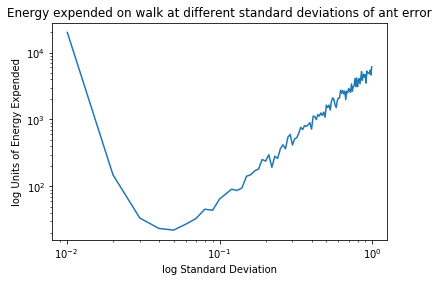

In [67]:
array_energy = []
S = np.arange(0.0001, 1, 0.01)
#same code from #2
for s in S:
    final_distance_array = []
    for i in np.arange(100):
        set_x3 = np.cumsum(np.random.normal(0, 1, 3600))
        set_y3 = np.cumsum(np.random.normal(0, 1, 3600))
        actual_xst = set_x3[0]
        actual_yst = set_y3[0]
        actual_xend = set_x[-1]
        actual_yend = set_y[-1]
        cum_x = set_x + np.cumsum(np.random.normal(0, s, 3600))
        cum_y = set_y + np.cumsum(np.random.normal(0, s, 3600))
        predicted_x_end = (set_x[-1] - cum_x[-1])-actual_xst
        predicted_y_end = (set_y[-1] - cum_y[-1])-actual_yst
        final_distance_array.append(distance(predicted_x_end, predicted_y_end))
    mean_dist = np.mean(final_distance_array)
    array_energy.append(np.exp(0.1/s) + mean_dist**2)

plt.plot(S, array_energy)
plt.xlabel('log Standard Deviation')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('log Units of Energy Expended')
plt.title('Energy expended on walk at different standard deviations of ant error')
plt.show()

## Question 3b

We notice that the ant spends the least amount of energy between 10^-2 and 10^-1 log standard deviations, and anything more or less would have an exponential increase in energy consumed. That means that there's an ideal SD that each ant should have as they path integrate in order for them to expend the least amount of energy. Evolutionarily, this is significant because a smaller SD/variability in error of the difference between their predicted path and their actual home would would allow them to optimize their energy expenditure. If they are to remember their path back home more efficiently with path integration, they would be able to bring food home quicker and be able to alert more ants to follow its path over, which would help the colony thrive.